<a href="https://colab.research.google.com/github/Brendannigel/Navier-Stokes/blob/master/Step_4_Burgers_Equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import sympy as sy

In [0]:
from sympy import init_printing 
init_printing (use_latex=True) #using latex we can ge ta nicely renedered version of our inital condition equation

In [3]:
x, v, t = sy.symbols('x v t') #the process starts off by setting the symbolic veriales for our equation before we write out phi equation
phi = (sy.exp(-(x-4*t)**2 / (4*v*(t+1))) +
       sy.exp(-(x-4*t-2* sy.pi)**2 / (4*v*(t+1))))
phi

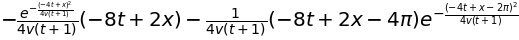

In [4]:
phiprime = phi.diff(x) #evaluating the partial derivative as a task
phiprime

In [5]:
print(phiprime)

-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*v*(t + 1)))/(4*v*(t + 1)) - (-8*t + 2*x - 4*pi)*exp(-(-4*t + x - 2*pi)**2/(4*v*(t + 1)))/(4*v*(t + 1))


In [6]:
from sympy.utilities.lambdify import lambdify #it is used to take the sympy symbolic equation and turn it into a callable function
u = -2*v * (phiprime / phi) + 4
print(u)

-2*v*(-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*v*(t + 1)))/(4*v*(t + 1)) - (-8*t + 2*x - 4*pi)*exp(-(-4*t + x - 2*pi)**2/(4*v*(t + 1)))/(4*v*(t + 1)))/(exp(-(-4*t + x - 2*pi)**2/(4*v*(t + 1))) + exp(-(-4*t + x)**2/(4*v*(t + 1)))) + 4


In [7]:
ufunc = lambdify((t, x, v), u)
print(ufunc(1, 4, 3))

3.49170664206445


Bugers Equation Starts here:

In [8]:
from matplotlib import pyplot
%matplotlib inline

#variables for example of Burgers equation are defined and listed below 
nx = 101
nt = 100
dx = 2 * np.pi / (nx - 1)
v = 0.07
dt = dx * v

x = np.linspace(0, 2 * np.pi, nx)
un = np.empty(nx)
t = 0

u = np.asarray([ufunc(t, x0, v) for x0 in x])
u

array([4.        , 4.06283185, 4.12566371, 4.18849556, 4.25132741,
       4.31415927, 4.37699112, 4.43982297, 4.50265482, 4.56548668,
       4.62831853, 4.69115038, 4.75398224, 4.81681409, 4.87964594,
       4.9424778 , 5.00530965, 5.0681415 , 5.13097336, 5.19380521,
       5.25663706, 5.31946891, 5.38230077, 5.44513262, 5.50796447,
       5.57079633, 5.63362818, 5.69646003, 5.75929189, 5.82212374,
       5.88495559, 5.94778745, 6.0106193 , 6.07345115, 6.136283  ,
       6.19911486, 6.26194671, 6.32477856, 6.38761042, 6.45044227,
       6.51327412, 6.57610598, 6.63893783, 6.70176967, 6.76460125,
       6.82742866, 6.89018589, 6.95176632, 6.99367964, 6.72527549,
       4.        , 1.27472451, 1.00632036, 1.04823368, 1.10981411,
       1.17257134, 1.23539875, 1.29823033, 1.36106217, 1.42389402,
       1.48672588, 1.54955773, 1.61238958, 1.67522144, 1.73805329,
       1.80088514, 1.863717  , 1.92654885, 1.9893807 , 2.05221255,
       2.11504441, 2.17787626, 2.24070811, 2.30353997, 2.36637

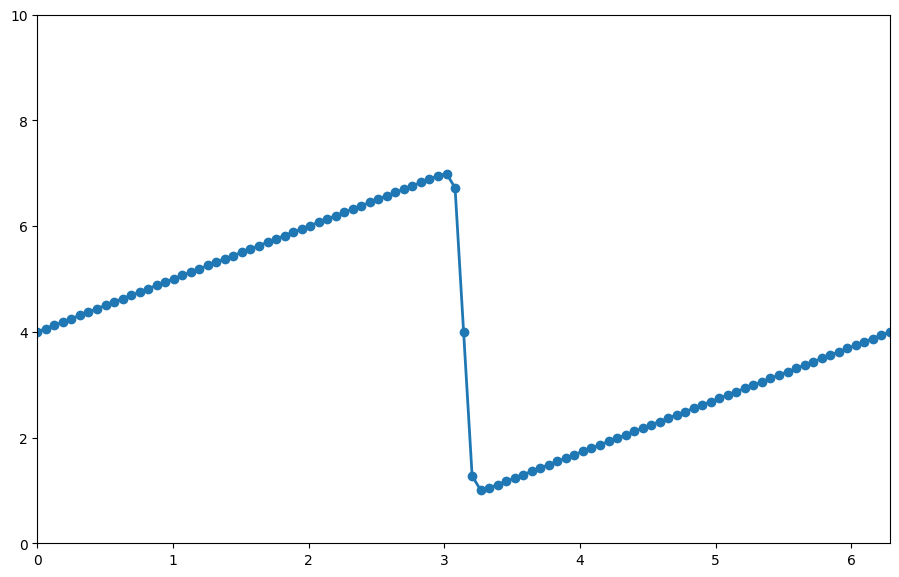

In [9]:
#Generating a plot of the inital condition
pyplot.figure(figsize=(11, 7), dpi=100)
pyplot.plot(x, u, marker='o', lw=2)
pyplot.xlim([0, 2 * np.pi])
pyplot.ylim([0, 10]);

In [0]:
for n in range(nt):
    un = u.copy()
    for i in range(1, nx-1):
        u[i] = un[i] - un[i] * dt / dx *(un[i] - un[i-1]) + v * dt / dx**2 *\
                (un[i+1] - 2 * un[i] + un[i-1])
    u[0] = un[0] - un[0] * dt / dx * (un[0] - un[-2]) + v * dt / dx**2 *\
                (un[1] - 2 * un[0] + un[-2])
    u[-1] = u[0]
        
u_analytical = np.asarray([ufunc(nt * dt, xi, v) for xi in x])

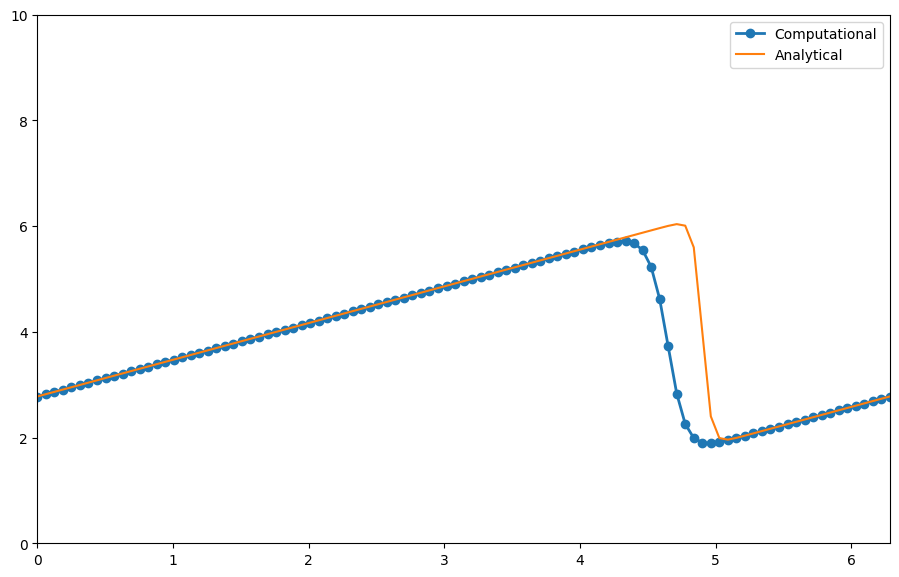

In [11]:
pyplot.figure(figsize=(11, 7), dpi=100)
pyplot.plot(x,u, marker='o', lw=2, label='Computational')
pyplot.plot(x, u_analytical, label='Analytical')
pyplot.xlim([0, 2 * np.pi])
pyplot.ylim([0, 10])
pyplot.legend();